In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('categories.csv', sep=';',low_memory=False)

In [3]:
df.head(5)

,Названия строк,3D принтеры,3D сканеры,BLANK,DIN-рейки,Other Products,SFP модули,USB адаптеры,Абразивно-отрезные станки,Аварийные ограждения,...,Электрорубанки,Эмульсолы для смазки опалубки и форм ЖБИ,Энергосберегающие лампы,Этажерки,"Этикетки, ценники и оборудование для торговой маркировки",Ящики,Ящики для песка,Ящики и контейнеры для песка и химикатов,Ящики и тара,Ящики-органайзеры
0,2021-01-01 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-02 00:00:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"1,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03 00:00:00.000,NaN,NaN,"1,00",NaN,NaN,NaN,NaN,NaN,NaN,...,"2,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,00","3,00"
3,2021-01-04 00:00:00.000,NaN,NaN,"136,00","6,00","3,00","2,00","2,00",NaN,NaN,...,"31,00",NaN,"5,00",NaN,NaN,NaN,NaN,NaN,"32,00","57,00"
4,2021-01-05 00:00:00.000,NaN,NaN,"98,00","26,00",NaN,"1,00","1,00",NaN,NaN,...,"27,00",NaN,"33,00",NaN,NaN,NaN,NaN,NaN,"17,00","76,00"


In [4]:
df.rename(columns = {'Названия строк':'дата'}, inplace = True)

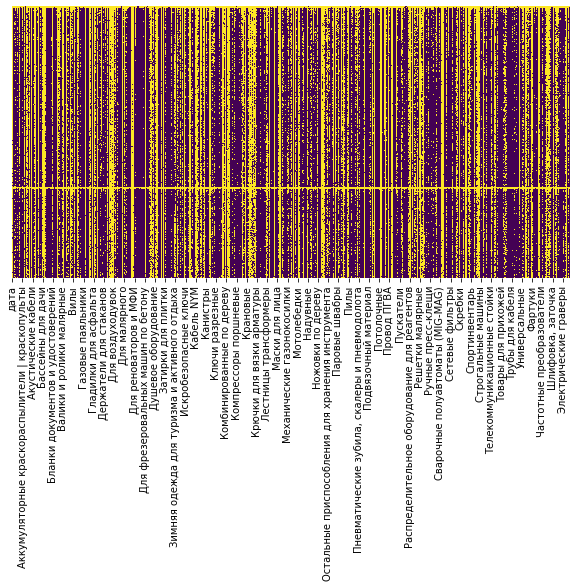

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,5))
sns_heatmap = sns.heatmap(
    df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df['дата'].isna().value_counts()

False    549
Name: дата, dtype: int64

In [7]:
df.fillna('0', inplace=True)

In [8]:
values = df.drop(['дата'], axis='columns')

for value in values:
    values[value] = values[value].apply(lambda x: int(x.replace(' ', '').replace(',00', '') ))
values

,3D принтеры,3D сканеры,BLANK,DIN-рейки,Other Products,SFP модули,USB адаптеры,Абразивно-отрезные станки,Аварийные ограждения,Аварийные светильники,...,Электрорубанки,Эмульсолы для смазки опалубки и форм ЖБИ,Энергосберегающие лампы,Этажерки,"Этикетки, ценники и оборудование для торговой маркировки",Ящики,Ящики для песка,Ящики и контейнеры для песка и химикатов,Ящики и тара,Ящики-органайзеры
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,3,3
3,0,0,136,6,3,2,2,0,0,2,...,31,0,5,0,0,0,0,0,32,57
4,0,0,98,26,0,1,1,0,0,4,...,27,0,33,0,0,0,0,0,17,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0,0,685,80,10,0,1,0,18,43,...,82,6,215,3,54,0,11,0,513,220
545,0,0,5607,159,5,0,0,1,23,12,...,98,7,231,14,33,0,2,3,321,222
546,0,0,794,174,9,10,1,1,1,45,...,111,0,103,21,24,1,2,0,300,222
547,0,0,355,30,1,1,1,1,0,16,...,92,0,47,2,20,0,0,0,112,137


In [9]:
df = pd.concat([df.дата, values],axis=1)
df.head()

,дата,3D принтеры,3D сканеры,BLANK,DIN-рейки,Other Products,SFP модули,USB адаптеры,Абразивно-отрезные станки,Аварийные ограждения,...,Электрорубанки,Эмульсолы для смазки опалубки и форм ЖБИ,Энергосберегающие лампы,Этажерки,"Этикетки, ценники и оборудование для торговой маркировки",Ящики,Ящики для песка,Ящики и контейнеры для песка и химикатов,Ящики и тара,Ящики-органайзеры
0,2021-01-01 00:00:00.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-02 00:00:00.000,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2021-01-03 00:00:00.000,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,3,3
3,2021-01-04 00:00:00.000,0,0,136,6,3,2,2,0,0,...,31,0,5,0,0,0,0,0,32,57
4,2021-01-05 00:00:00.000,0,0,98,26,0,1,1,0,0,...,27,0,33,0,0,0,0,0,17,76


In [10]:
df.дата = pd.to_datetime(df.дата)

In [11]:
###    КОВИД   импорт ###

covid  = pd.read_csv('countries-aggregated.csv')
covid = covid [covid .Country == 'Russia']
covid = covid[['Date','Confirmed']]

covid.Date = pd.to_datetime(covid.Date)
covid.columns = ['дата', 'covid']

df = df.join(covid.set_index('дата'), on='дата')


###    КОВИД преобразование    ###

covid_change = []
for i in df.covid.index:
    try:
        covid_change.append(df.covid[i] - df.covid[i-1])
    except: covid_change.append(26000)
    
covid_change = pd.Series(covid_change)
for i in covid_change[covid_change.isna()].index:
    covid_change[i] = 10892*(0.99)**(i - 471)
    
df.covid = covid_change

In [12]:
day_of_year = pd.to_datetime(df.дата).dt.day_of_year
day_of_year.name = 'day_of_year'
df = pd.concat([df,day_of_year],axis=1)

In [13]:
days_from_begining = pd.Series(range(0,549))
days_from_begining.name = 'days_from_begining'
df = pd.concat([df,days_from_begining],axis=1)

In [14]:
df.covid

0      26000.000000
1      25938.000000
2      23845.000000
3      23015.000000
4      23955.000000
           ...     
544     5229.700745
545     5177.403738
546     5125.629700
547     5074.373403
548     5023.629669
Name: covid, Length: 549, dtype: float64

In [15]:
year = pd.to_datetime(df.дата).dt.year
year.name = 'year'
df = pd.concat([df,year],axis=1)

In [16]:
war = []
for i in range(0,549):
    if i >= df.дата[df.дата == '2022-02-24'].index:
        war.append(1)
    else:war.append(0)
    
war = pd.Series(war)
war.name='war'

df = pd.concat([df,war],axis=1)

In [17]:
corr = df.corr()

In [18]:
corr

,3D принтеры,3D сканеры,BLANK,DIN-рейки,Other Products,SFP модули,USB адаптеры,Абразивно-отрезные станки,Аварийные ограждения,Аварийные светильники,...,Ящики,Ящики для песка,Ящики и контейнеры для песка и химикатов,Ящики и тара,Ящики-органайзеры,covid,day_of_year,days_from_begining,year,war
3D принтеры,1.000000,0.283171,0.021793,0.021980,-0.036282,0.114191,-0.057512,-0.007606,-0.009688,0.159810,...,0.093262,0.036872,-0.017387,0.132026,0.130636,0.019108,0.013525,0.179758,0.157437,0.163776
3D сканеры,0.283171,1.000000,0.069159,0.022492,-0.023032,0.022406,0.001113,-0.020882,-0.015720,0.213480,...,0.001100,0.006201,-0.008562,0.052860,0.065428,-0.007376,0.088751,0.023450,-0.030330,-0.023794
BLANK,0.021793,0.069159,1.000000,0.169019,0.070213,0.116577,0.057222,0.140774,0.106419,0.236297,...,0.174796,0.168451,0.227487,0.284366,0.330403,-0.002395,0.316297,0.138415,-0.057647,-0.053595
DIN-рейки,0.021980,0.022492,0.169019,1.000000,0.228829,0.122345,-0.001513,0.217332,0.150035,0.303424,...,0.227737,0.176492,0.149850,0.450761,0.424852,0.057016,0.114295,0.313301,0.221345,0.233056
Other Products,-0.036282,-0.023032,0.070213,0.228829,1.000000,0.055150,0.102282,0.138119,0.038928,0.129541,...,0.032352,0.078396,0.055673,0.244462,0.252209,-0.072088,0.129383,0.063772,-0.017002,0.056940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
covid,0.019108,-0.007376,-0.002395,0.057016,-0.072088,0.052669,0.152144,0.176714,0.032517,0.077514,...,0.131143,-0.008111,-0.045048,0.118841,0.243027,1.000000,-0.175377,0.242250,0.325384,-0.096317
day_of_year,0.013525,0.088751,0.316297,0.114295,0.129383,0.034084,0.095768,0.035030,0.040678,0.117065,...,0.037327,0.077840,0.161610,0.256386,0.260253,-0.175377,1.000000,0.174798,-0.423997,-0.183367
days_from_begining,0.179758,0.023450,0.138415,0.313301,0.063772,0.089863,-0.196171,0.332944,0.009025,0.281268,...,0.359833,0.134607,0.156398,0.542199,0.355586,0.242250,0.174798,1.000000,0.817607,0.736322
year,0.157437,-0.030330,-0.057647,0.221345,-0.017002,0.062726,-0.236446,0.285765,-0.015486,0.190260,...,0.309155,0.078295,0.049353,0.348799,0.174886,0.325384,-0.423997,0.817607,1.000000,0.784517


<AxesSubplot:>

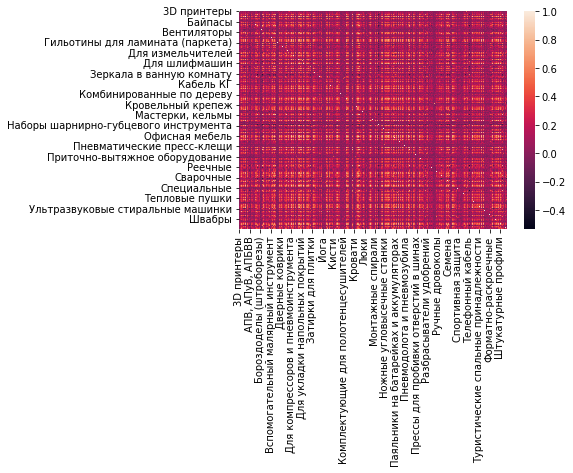

In [19]:
sns.heatmap(corr)

In [33]:
from sklearn.model_selection import train_test_split 

In [ ]:
train_test_split()

In [27]:
for i,j in corr.covid.sort_values(ascending=False).items():
    print(j, i)

1.0 covid
0.543417396562211 Бактерицидные рециркуляторы воздуха
0.48660932130874446 Системы линейного перемещения
0.43166941118544294 Товары для охоты
0.39915683904031385 Шкафы и пеналы для ванной комнаты
0.38680144080039414 Кромочный (Окантовочный) фрезер
0.38594593339266414 Аккумуляторные граверы
0.37795346298152555 АПВ, АПуВ, АПБВВ
0.37761047693540906 Кухонные вытяжки
0.37732299429056093 Фрезеры
0.3771889340818971 Ледорубы
0.3659492788394985 Ручной фрезер
0.34195336023877837 Для очистителей и увлажнителей воздуха
0.33642114702528686 Сетевое оборудование
0.3276866990393959 Семена
0.32538419692172643 year
0.3246258494528202 Приводные ремни
0.32379125208119997 Рейсмусы
0.32347477074783904 Противогололедные реагенты, техническая соль, гранитная крошка
0.3178692096790591 Мойки воздуха
0.316224075188376 Пистолеты газовые
0.3126120781826745 Сальники
0.31021670761957193 Инсталляционные системы
0.30749179044105346 Пускатели
0.306306364753404 Циркулярные
0.3044333610607495 Газовые паяльники
0